In [53]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from PIL import Image
from PIL.ImageOps import mirror
from PIL.ImageEnhance import Brightness

In [33]:
path = '../binary_images/images/img_0.jpg'
img = Image.open(path).convert('L')

In [34]:
what = Brightness(img)

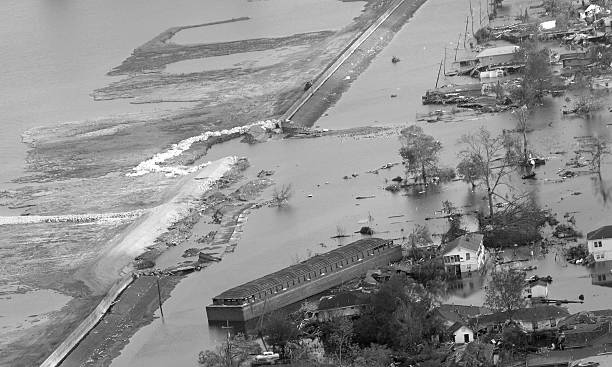

In [49]:
what.enhance(1)

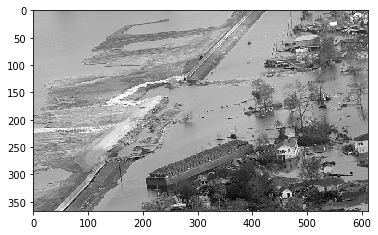

In [28]:
img = Image.open(path).convert('L')
img = img.remap_palette(list(range(256)))
plt.imshow(img, cmap='gray')

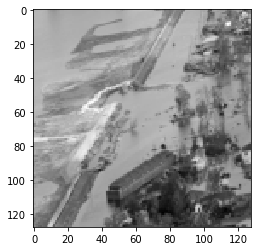

In [36]:
img = Image.open(path)
img = img.resize((128, 128), Image.BILINEAR)
plt.imshow(img, cmap='gray')

In [39]:
img.save('../images/img_000.jpg')

In [ ]:
img.img = Image.open(path)
img = img.resize((79, 79), Image.LANCZOS)
img = img.crop((0, 0, 64, 64))
plt.imshow(img, cmap='gray')

In [59]:
def augment_images(image_file_name):
    img = Image.open('../binary_images/images/' + image_file_name).convert('RGB').convert('L') # L = greyscale
    
    # downsample the image
    img_resized = img.resize((96, 96), Image.BILINEAR)
    
    # reverse the image
    imgs_reversed = [img_resized.copy(), mirror(img_resized.copy())]
    
    # brighten and darken the image
    imgs_enhanced = []
    enhance_amounts = [0.5, 0.75, 1, 1.25, 1.5]
    for img_reversed in imgs_reversed:
        img_enhancer = Brightness(img_reversed)
        for enhance_amount in enhance_amounts:
            imgs_enhanced.append(
                img_enhancer.enhance(enhance_amount)
            )
    
    # scan along the image to create several sub-images at 32x32
    imgs_scanned = []
    for img_enhanced in imgs_enhanced:
        for i in range(4):
            for j in range(4):
                imgs_scanned.append(
                    img_enhanced.crop((16*i, 16*j, 32+16*i, 32+16*j))
                )
    
    for i, img_scanned in enumerate(imgs_scanned):
        img_scanned.save(f'../binary_images/img/{image_file_name[:-4]}_{i}.jpg') 

In [62]:
5*4*4*2

160

In [61]:
5*4*4*2*908

145280

In [60]:
start_time = time.time()
for i in range(0, 908):
    if i % 50 == 0:
        print(f'Augmenting image {i} at time {round(time.time() - start_time)} s...')
    augment_images(f'img_{i}.jpg')

Augmenting image 0 at time 0 s...
Augmenting image 50 at time 1 s...
Augmenting image 100 at time 2 s...
Augmenting image 150 at time 3 s...
Augmenting image 200 at time 4 s...
Augmenting image 250 at time 4 s...
Augmenting image 300 at time 5 s...
Augmenting image 350 at time 6 s...
Augmenting image 400 at time 7 s...
Augmenting image 450 at time 8 s...
Augmenting image 500 at time 9 s...
Augmenting image 550 at time 9 s...
Augmenting image 600 at time 10 s...
Augmenting image 650 at time 11 s...
Augmenting image 700 at time 12 s...
Augmenting image 750 at time 13 s...
Augmenting image 800 at time 14 s...
Augmenting image 850 at time 15 s...
Augmenting image 900 at time 16 s...
